In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

# import datasets
train_df = pd.read_csv('./tabular-playground-series-aug-2021/train.csv')
test_df = pd.read_csv('./tabular-playground-series-aug-2021/test.csv')
submission = pd.read_csv('./tabular-playground-series-aug-2021/submission.csv')

# converting column without decimal to integer
for col in train_df.columns:
    if np.sum((train_df[col] - train_df[col].astype('int'))) == 0:
        train_df[col] = train_df[col].astype('int')
        
for col in test_df.columns:
    if np.sum((test_df[col] - test_df[col].astype('int'))) == 0:
        test_df[col] = test_df[col].astype('int')

KeyboardInterrupt: 

In [4]:
train_df.head()

id        f0   f1        f2        f3           f4        f5         f6  \
0   0 -0.002350   59  0.766739 -1.350460    42.272700 16.685700  30.359900   
1   1  0.784462  145 -0.463845 -0.530421 27324.900000  3.475450 160.498000   
2   2  0.317816   19 -0.432571 -0.382644  1383.260000 19.712900  31.102600   
3   3  0.210753   17 -0.616454  0.946362  -119.253000  4.082350 185.257000   
4   4  0.439671   20  0.968126 -0.092546    74.302000 12.306500  72.186000   

         f7         f8       f9       f10       f11        f12       f13  \
0  1.267300   0.392007 1.091010  1.968740  1.874640 117.286000  6.716200   
1  0.828007   3.735860 1.281380 -2.739470 -0.529506 157.670000  0.696384   
2 -0.515354  34.430800 1.242100  2.901800 -0.960340 118.590000  7.696420   
3  1.383310 -47.521400 1.091300 -1.512000 -1.292340 125.461000  7.343230   
4 -0.233964  24.399100 1.101510  1.773480 -0.546781 147.186000 17.394300   

        f14      f15       f16       f17       f18       f19       f20  \
0  0.985656 0.973428   4004232  0.377896  1.033820  0.574531  0.122371   
1  1.441230 0.159056  23567462 -0.089583 -0.711628 -1.045860  0.139920   
2  1.488760 0.387277    235760  0.055568  0.268560  0.718133  0.027133   
3 -3.092390 0.713795   1146032  0.326534  0.454842  0.219958  0.037982   
4  0.964678 0.964894  19272478  0.121071  0.422461 -0.103100 -0.000910   

        f21         f22      f23       f24       f25        f26    f27  \
0  8.186170 1517.830000 3.132190  0.112836  5.018680 116.766000  10891   
1  3.692940 -123.354000 7.740970 -0.852302  8.510250 161.175000  87801   
2 11.673400  270.247000 3.440510 -0.679071 13.378100 150.362000  14173   
3  5.151950 4893.860000 6.897510 -0.830552  4.431840 132.855000  77147   
4  8.141910  162.713000 1.565610 -0.300743  7.564580 160.995000   5780   

        f28      f29      f30       f31       f32      f33        f34  \
0  8.193660 5.797150 1.099990 14.868400 -0.275434 0.915721 167.800000   
1 12.020200 1.783930 1.231000 10.149700 -0.018724 1.011280 127.401000   
2  1.699540 7.047280 1.105130  7.628710  0.685721 0.809485 120.064000   
3 32.809000 4.063900 1.119110  3.917760  0.500353 0.206448 120.411000   
4 -1.542540 8.090810 1.605820  7.046320 -1.056850 1.727440 126.848000   

         f35      f36       f37       f38       f39       f40      f41  \
0  -7.534140 4.236320  1.629560  1.144400 -0.303139  4.092090 3.226170   
1  11.821400 5.996810 -0.953850  1.379370  1.079530  0.711923 2.906020   
2 194.427000 6.778660  0.634136  0.934386  0.926980  0.741116 2.422050   
3 233.537000 7.751310  0.625762 -1.940810  1.333210 -5.793170 1.565120   
4   0.910761 6.088680  0.150619  1.134610  1.553550 16.436400 2.488670   

       f42      f43        f44        f45       f46      f47       f48  \
0 0.074799 0.259497 289.492000 327.465000  5.389310 7.394790 -0.489950   
1 0.051206 0.755122 140.893000  29.525200 14.229600 3.532130 -0.405681   
2 0.260362 0.626639 369.579000 370.024000  4.488930 7.842900  1.196010   
3 0.309483 0.134558  84.863700  24.335300  4.871200 2.551040 -0.372300   
4 0.229194 0.374760 465.293000  76.859300  0.763062 8.206570 -0.646135   

        f49      f50      f51           f52       f53       f54   f55  \
0 20.292300 2.456600 1.447720 -10639.000000 85.600500 -0.178513  2815   
1 42.535700 1.435330 0.939771 138312.000000 59.881000 -0.070959  1435   
2 43.534300 2.591820 1.256710 168881.000000 83.841900  2.713230  2911   
3 14.896000 1.100130 0.892193  17006.600000 78.407800  0.425686  1723   
4 72.767400 1.444810 0.858525 -40791.900000 70.799800  0.169193  1199   

           f56      f57       f58       f59               f60        f61  \
0  -234.772000 1.833170 88.560500  0.367916 8575340000.000000  70.973300   
1  1046.880000 1.567700 29.430600  2.455150 4518200000.000000  75.560200   
2 23256.900000 3.918960 97.557800  4.385380  844497000.000000  99.493300   
3   375.240000 1.945390 98.150000 -0.109164 3543970000.000000  60.808200   
4  -120.388000 1.687860 84.064900 -0.08

In [5]:
print(train_df.shape)

(250000, 102)


In [6]:

train_df.describe()

id            f0            f1            f2            f3  \
count 250000.000000 250000.000000 250000.000000 250000.000000 250000.000000   
mean  124999.500000      0.511213     51.378476      0.107155      0.050010   
std    72168.927986      0.307884     42.396636      1.322200      0.792368   
min        0.000000     -0.069273    -17.000000     -7.895580     -1.475560   
25%    62499.750000      0.251287     18.000000     -0.611172     -0.719417   
50%   124999.500000      0.514962     41.000000      0.253815      0.004099   
75%   187499.250000      0.777323     75.000000      0.759249      0.765456   
max   249999.000000      1.072070    273.000000      9.768590      1.680190   

                 f4            f5            f6            f7            f8  \
count 250000.000000 250000.000000 250000.000000 250000.000000 250000.000000   
mean    3595.133426      8.205953    164.508753      0.375533     16.669745   
std     6072.401061      5.475723    183.335563      0.813597     99.758709   
min    -7589.280000     -3.291050    -40.967200     -4.143080   -502.813000   
25%      163.864750      4.110128     27.894900     -0.026245    -17.392025   
50%      943.000500      7.472445     91.005250      0.619862      8.714945   
75%     4115.355000     11.030950    240.843750      0.933855     55.407625   
max    37847.500000     35.078000    947.143000      4.010380    465.956000   

                 f9           f10           f11           f12           f13  \
count 250000.000000 250000.000000 250000.000000 250000.000000 250000.000000   
mean       1.190382      0.063664      0.095226    136.746037      8.034918   
std        0.099700      2.433281      0.935765     14.422095      5.487786   
min        0.934037    -10.261200     -1.858720    108.086000     -2.115510   
25%        1.132640     -1.246857     -0.775796    124.486000      3.917245   
50%        1.170370      0.098015      0.169345    130.341000      7.145230   
75%        1.218880      1.465193      0.908570    150.789000     10.886200   
max        1.712450      8.570400      2.181420    173.854000     35.009000   

                f14           f15             f16           f17           f18  \
count 250000.000000 250000.000000   250000.000000 250000.000000 250000.000000   
mean       0.614930      0.752971  8891112.398220      0.009645      0.041674   
std        1.619192      0.626172  8508966.900014      0.103460      0.684975   
min       -8.648960     -1.805330 -1173084.000000     -0.341300     -2.777610   
25%       -0.552543      0.331163   971018.500000     -0.047658     -0.543708   
50%        1.132570      0.602811  6463494.000000      0.001599      0.167400   
75%        1.459792      1.009152 15277933.250000      0.061017      0.588710   
max        9.727590      4.302900 33460155.000000      0.494495      3.242530   

                f19           f20           f21           f22           f23  \
count 250000.000000 250000.000000 250000.000000 250000.000000 250000.000000   
mean       0.074226      0.321328      9.928838   3622.094586      7.413526   
std        0.739724      0.337792      5.661423   6328.918702      3.740530   
min       -3.693950     -0.029620     -0.732186 -10875.700000      0.095849   
25%       -0.487868      0.041971      6.020198    162.032000      4.724955   
50%        0.171684      0.173137      8.881610    907.796000      6.872090   
75%        0.603872      0.559843     12.111975   3975.502500      9.353863   
max        4.581250      1.151270     29.408100  45432.600000     25.713500   

                f24           f25           f26           f27           f28  \
count 250000.000000 250000.000000 250000.000000 250000.000000 250000.000000   
mean      -0.480271      6.046948    137.635093  47223.903504      5.469358   
std        0.712486      3.172873     15.710846  36013.179913      7.716520   
min       -1.771980     -2.759340    100.861000  -3391.000000     -4.283380   
25%       -1.015360      3.823762    126.059

In [7]:
test_df.head()

id       f0   f1        f2        f3           f4        f5         f6  \
0  250000 0.812665   15 -1.239120 -0.893251   295.577000 15.871200  23.043600   
1  250001 0.190344  131 -0.501361  0.801921    64.886600  3.097030 344.805000   
2  250002 0.919671   19 -0.057382  0.901419 11961.200000 16.396500 273.240000   
3  250003 0.860985   19 -0.549509  0.471799  7501.600000  2.806980  71.081700   
4  250004 0.313229   89  0.588509  0.167705  2931.260000  4.349860   1.571870   

         f7        f8       f9       f10       f11        f12       f13  \
0  0.942256 29.898000 1.113940 -1.312220 -1.110000 128.357000  7.344460   
1  0.807194 38.421900 1.096950 -5.636550  1.287090 128.250000  6.690850   
2 -0.003300 37.940000 1.152220 -3.403280  0.142553 152.386000 15.085200   
3  0.792136  0.395235 1.201570  0.870915  1.271310 157.147000  5.848850   
4  1.118300  7.754630 1.168070  0.671417  1.639820 128.023000 17.333600   

        f14      f15       f16       f17       f18       f19      f20  \
0 -1.030630 2.304030  13018510  0.019558  0.757686 -0.716056 0.022330   
1  1.836330 0.616096   1618530  0.067314 -0.808238 -0.320105 0.998695   
2  1.554870 1.654750  17563785 -0.166851 -1.262700  1.411200 0.003990   
3  1.385640 0.617328    252991  0.108450  0.479338 -0.719770 0.319796   
4  1.971640 0.252077    481327  0.102064 -0.442613 -0.636058 0.023135   

        f21          f22      f23       f24       f25        f26    f27  \
0  0.141964  8938.110000 6.443700  1.133730  6.527050 148.030000  80178   
1 15.113900  1432.860000 1.575100 -1.078910  2.804750 158.629000  78013   
2  8.780170  4043.780000 7.051120 -1.012880 10.044500 121.983000  88912   
3 25.200300  -170.328000 7.526390  0.739869  0.736874 129.194000  15850   
4 13.507000 10276.200000 3.360250 -1.425710  5.315750 139.739000  10964   

        f28       f29      f30      f31       f32      f33        f34  \
0  3.434410  5.535180 1.279520 8.235410 -1.306460 1.110690 153.408000   
1  0.869545 15.602800 1.242320 5.188940 -1.384710 0.893887 168.000000   
2 -0.486979  8.979680 1.198420 8.582120 -0.293621 1.883580 120.411000   
3 11.321700  4.592130 1.387780 4.916860 -0.010639 5.175640 118.858000   
4  3.074100  5.444460 1.141520 7.273900  0.262139 1.241720 118.918000   

         f35      f36       f37       f38      f39       f40       f41  \
0  50.858300 8.349220 -0.717611  1.934710 0.974460 -1.298910  2.308940   
1  58.900300 6.448280  1.195220  1.943250 0.966581 -8.597520  2.671540   
2 110.360000 5.181770  1.365780 -1.257880 0.928871  5.284490  2.102840   
3  13.961300 2.380680  0.883522  1.283920 1.427330  3.121770  1.744060   
4 778.040000 7.340670  0.654133  1.277900 0.983787 -4.467930 -0.791459   

       f42      f43        f44        f45       f46      f47       f48  \
0 0.075320 0.491064  45.319300  21.099300 11.925800 4.011830 -1.014700   
1 0.004659 0.488331 151.610000 560.819000  6.205490 5.843400 -0.857418   
2 0.091795 0.520486  82.077900  74.471200  6.098130 2.658750 -0.339302   
3 0.269816 0.637810 133.780000  57.754400  3.817850 9.230200 -1.298150   
4 0.124917 0.111257 174.786000  50.449500 18.324600 7.891540  0.996365   

         f49      f50      f51           f52       f53       f54   f55  \
0  93.468600 2.472300 1.623150  28220.200000 79.627700 -0.435385  1651   
1  52.020800 1.634990 0.618007  65940.800000 82.525200  0.806279   -17   
2 110.073000 2.438190 0.013437  34353.400000 93.158600  3.089920   825   
3 165.785000 1.377180 1.295860 -10886.400000 94.321600 -0.207208   160   
4 164.209000 1.363020 1.311300  -6608.040000 97.958800 -0.181913   709   

           f56      f57        f58       f59               f60        f61  \
0    30.455000 1.651390  90.181800  0.505812 2726430000.000000 100.620000   
1  3257.990000 3.543110  64.733900  0.387583 6191160000.000000 112.323000   
2   464.775000 1.629280  88.292700  0.099524 3349070000.000000  34.843700   
3   447.421000 1.499570  89.356700  0.897223 2364120000.000000  50.334300   
4 28748.400000 1.627

In [8]:
print(test_df.shape)

(150000, 101)


In [9]:
submission.head()

ID     loss
0  250000 8.019618
1  250001 5.803230
2  250002 8.370809
3  250003 7.747217
4  250004 6.415876

In [10]:
test_df.dtypes

id       int32
f0     float64
f1       int32
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f10    float64
f11    float64
f12    float64
f13    float64
f14    float64
f15    float64
f16      int32
f17    float64
f18    float64
f19    float64
f20    float64
f21    float64
f22    float64
f23    float64
f24    float64
f25    float64
f26    float64
f27      int32
f28    float64
f29    float64
f30    float64
f31    float64
f32    float64
f33    float64
f34    float64
f35    float64
f36    float64
f37    float64
f38    float64
f39    float64
f40    float64
f41    float64
f42    float64
f43    float64
f44    float64
f45    float64
f46    float64
f47    float64
f48    float64
f49    float64
f50    float64
f51    float64
f52    float64
f53    float64
f54    float64
f55      int32
f56    float64
f57    float64
f58    float64
f59    float64
f60    float64
f61    float64
f62    float64
f63    float64
f64    float64
f65    flo

In [11]:
integer_features = ['f1', 'f16', 'f27', 'f55', 'f60', 'f86']
unique_values_train = pd.DataFrame(train_df[integer_features].nunique())    #不同值的个数
unique_values_train = unique_values_train.reset_index(drop=False)   #重新设置新的index(0,1,2……)
unique_values_train.columns = ['Features', 'Count']

unique_values_percent_train = pd.DataFrame(train_df[integer_features].nunique()/train_df.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']

unique_values_test = pd.DataFrame(test_df[integer_features].nunique())
unique_values_test = unique_values_test.reset_index(drop=False)
unique_values_test.columns = ['Features', 'Count']

unique_values_percent_test = pd.DataFrame(test_df[integer_features].nunique()/test_df.shape[0])
unique_values_percent_test = unique_values_percent_test.reset_index(drop=False)
unique_values_percent_test.columns = ['Features', 'Count']

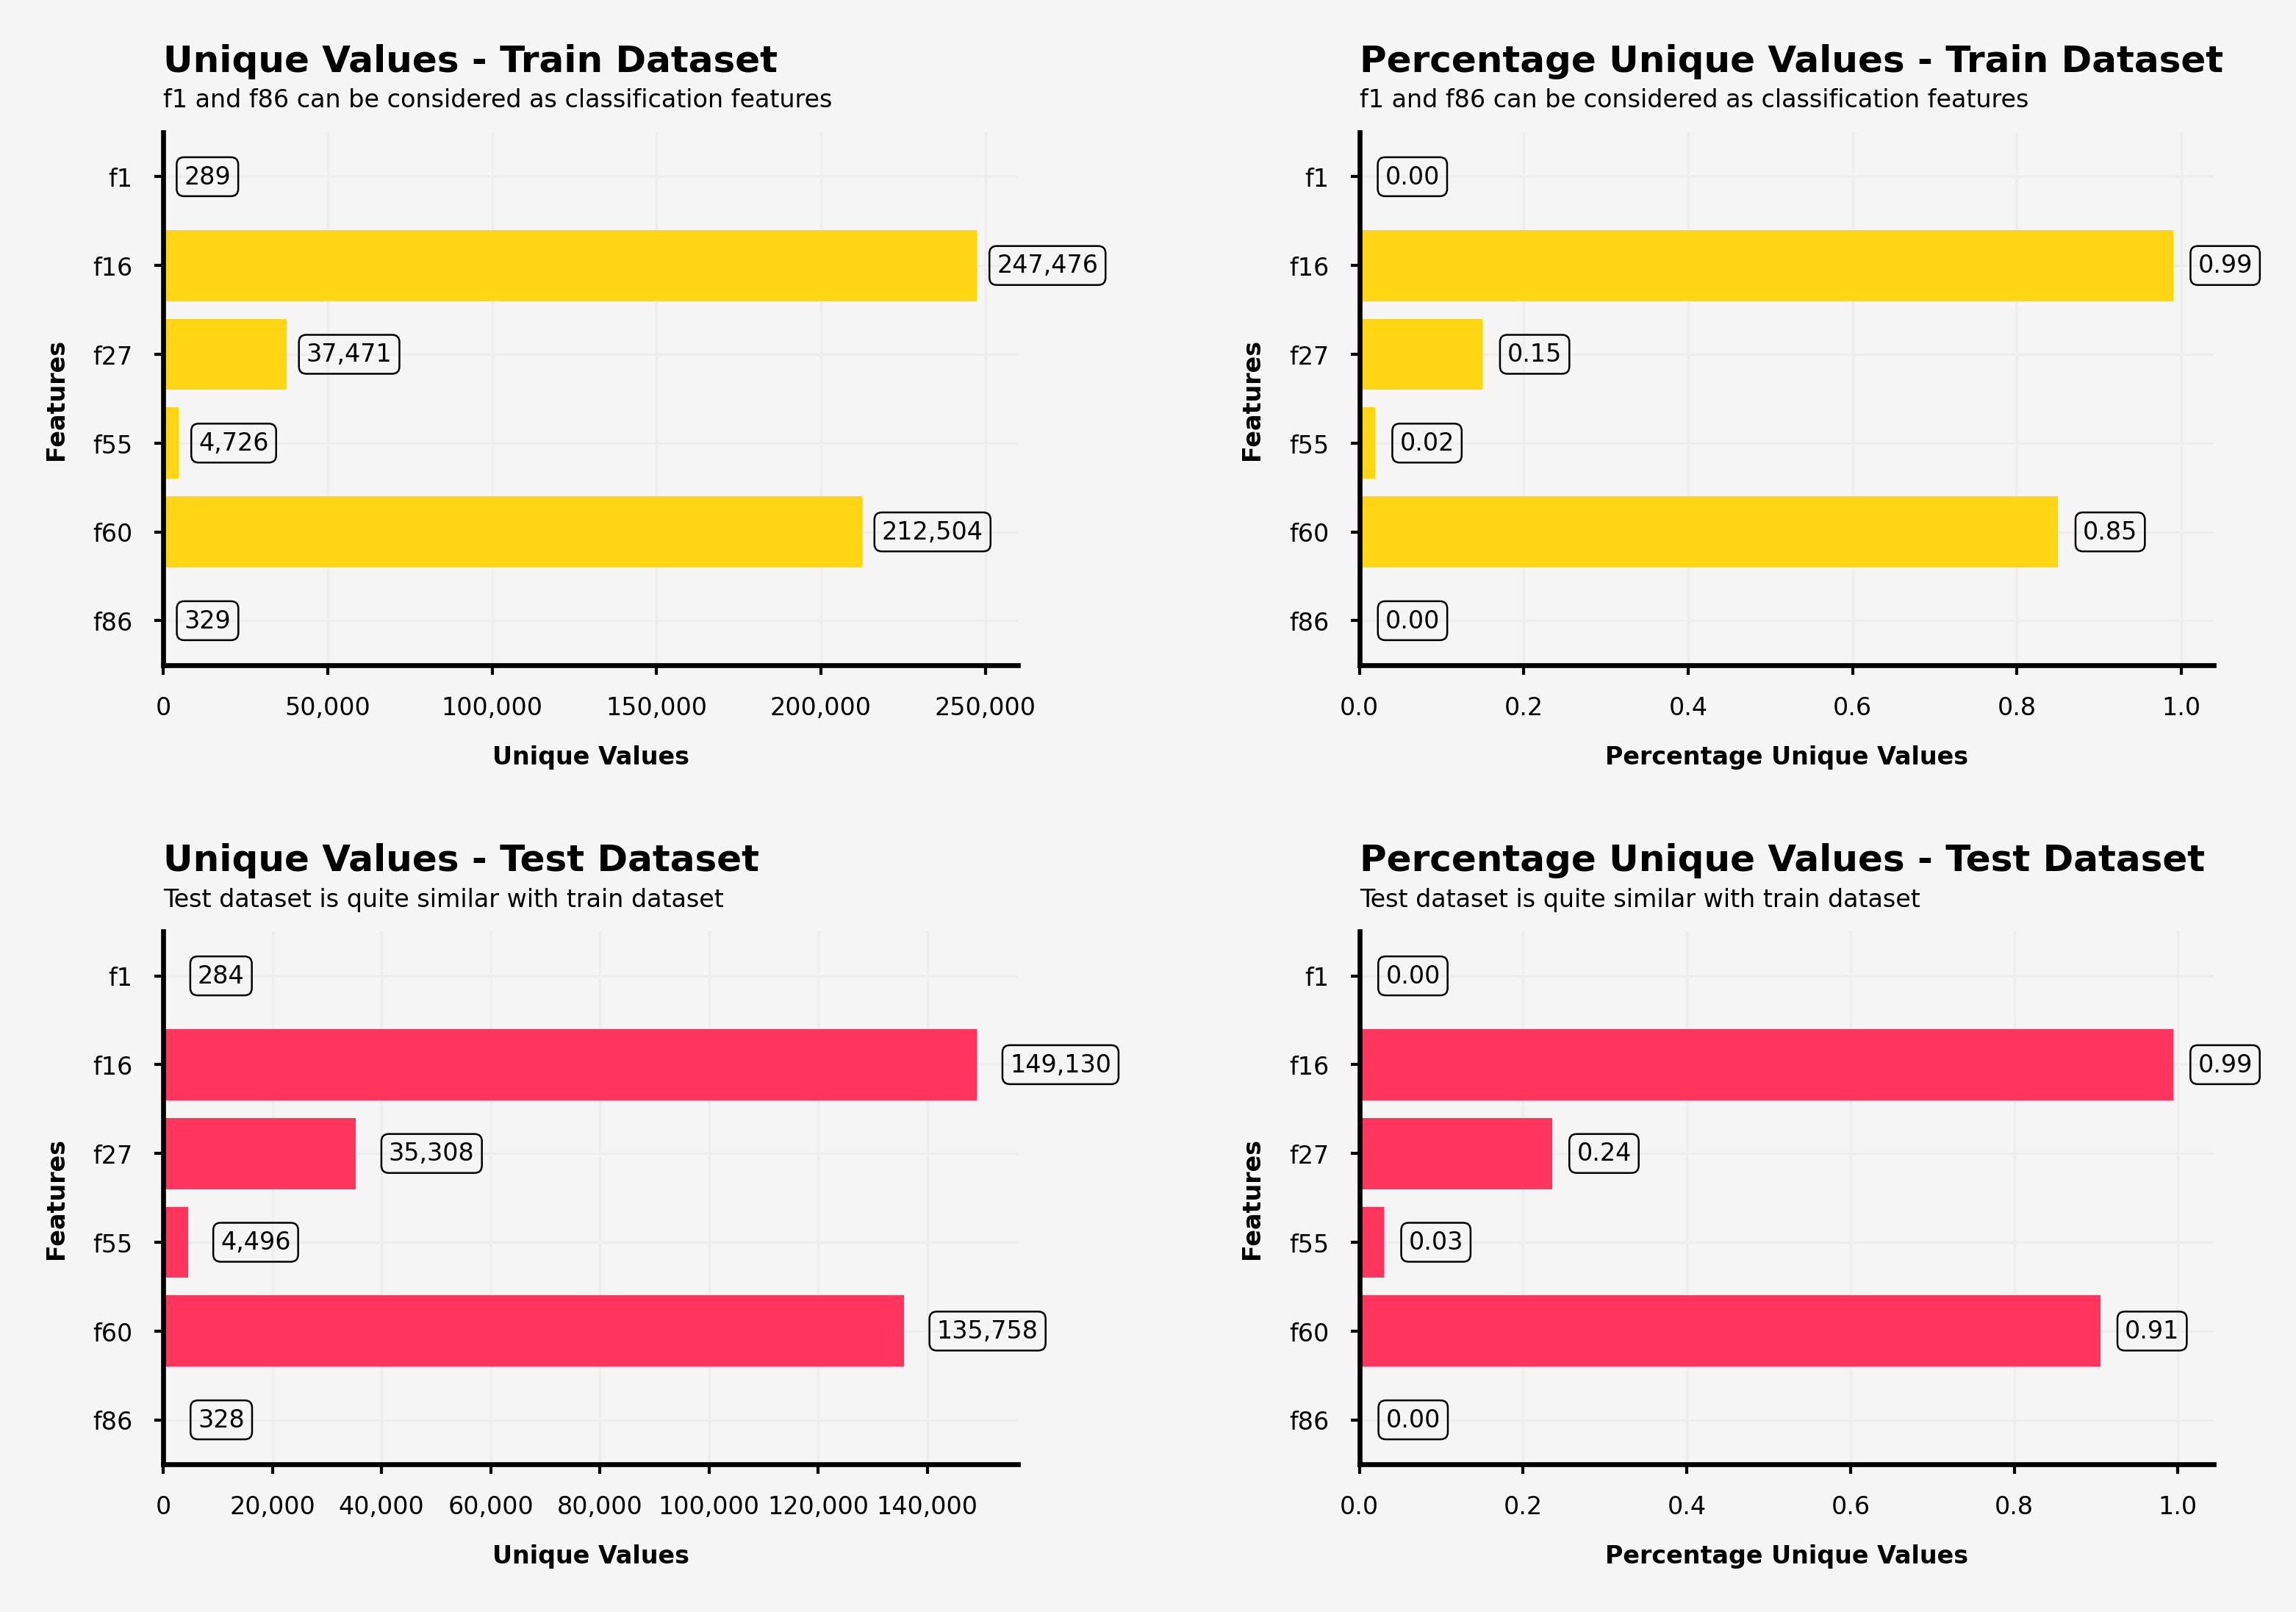

In [12]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*6)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:  #移除边框线
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.5, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1, 'f1 and f86 can be considered as classification features', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 6000
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Percentage Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.5, 'Percentage Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1, 'f1 and f86 can be considered as classification features', fontsize=4, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*6)
    
ax3 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3_sns = sns.barplot(ax=ax3, y=unique_values_test['Features'], x=unique_values_test['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax3_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax3_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax3_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3.text(0, -1.5, 'Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax3.text(0, -1, 'Test dataset is quite similar with train dataset', fontsize=4, ha='left', va='top')
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax3.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 6000
    y = p.get_y() + p.get_height() / 2 
    ax3.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax4 = fig.add_subplot(gs[1, 1])
for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)
ax4.set_facecolor(background_color)
ax4_sns = sns.barplot(ax=ax4, y=unique_values_percent_test['Features'], x=unique_values_percent_test['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax4_sns.set_xlabel("Percentage Unique Values",fontsize=4, weight='bold')
ax4_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax4_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4.text(0, -1.5, 'Percentage Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax4.text(0, -1, 'Test dataset is quite similar with train dataset', fontsize=4, ha='left', va='top')
# data label
for p in ax4.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2 
    ax4.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

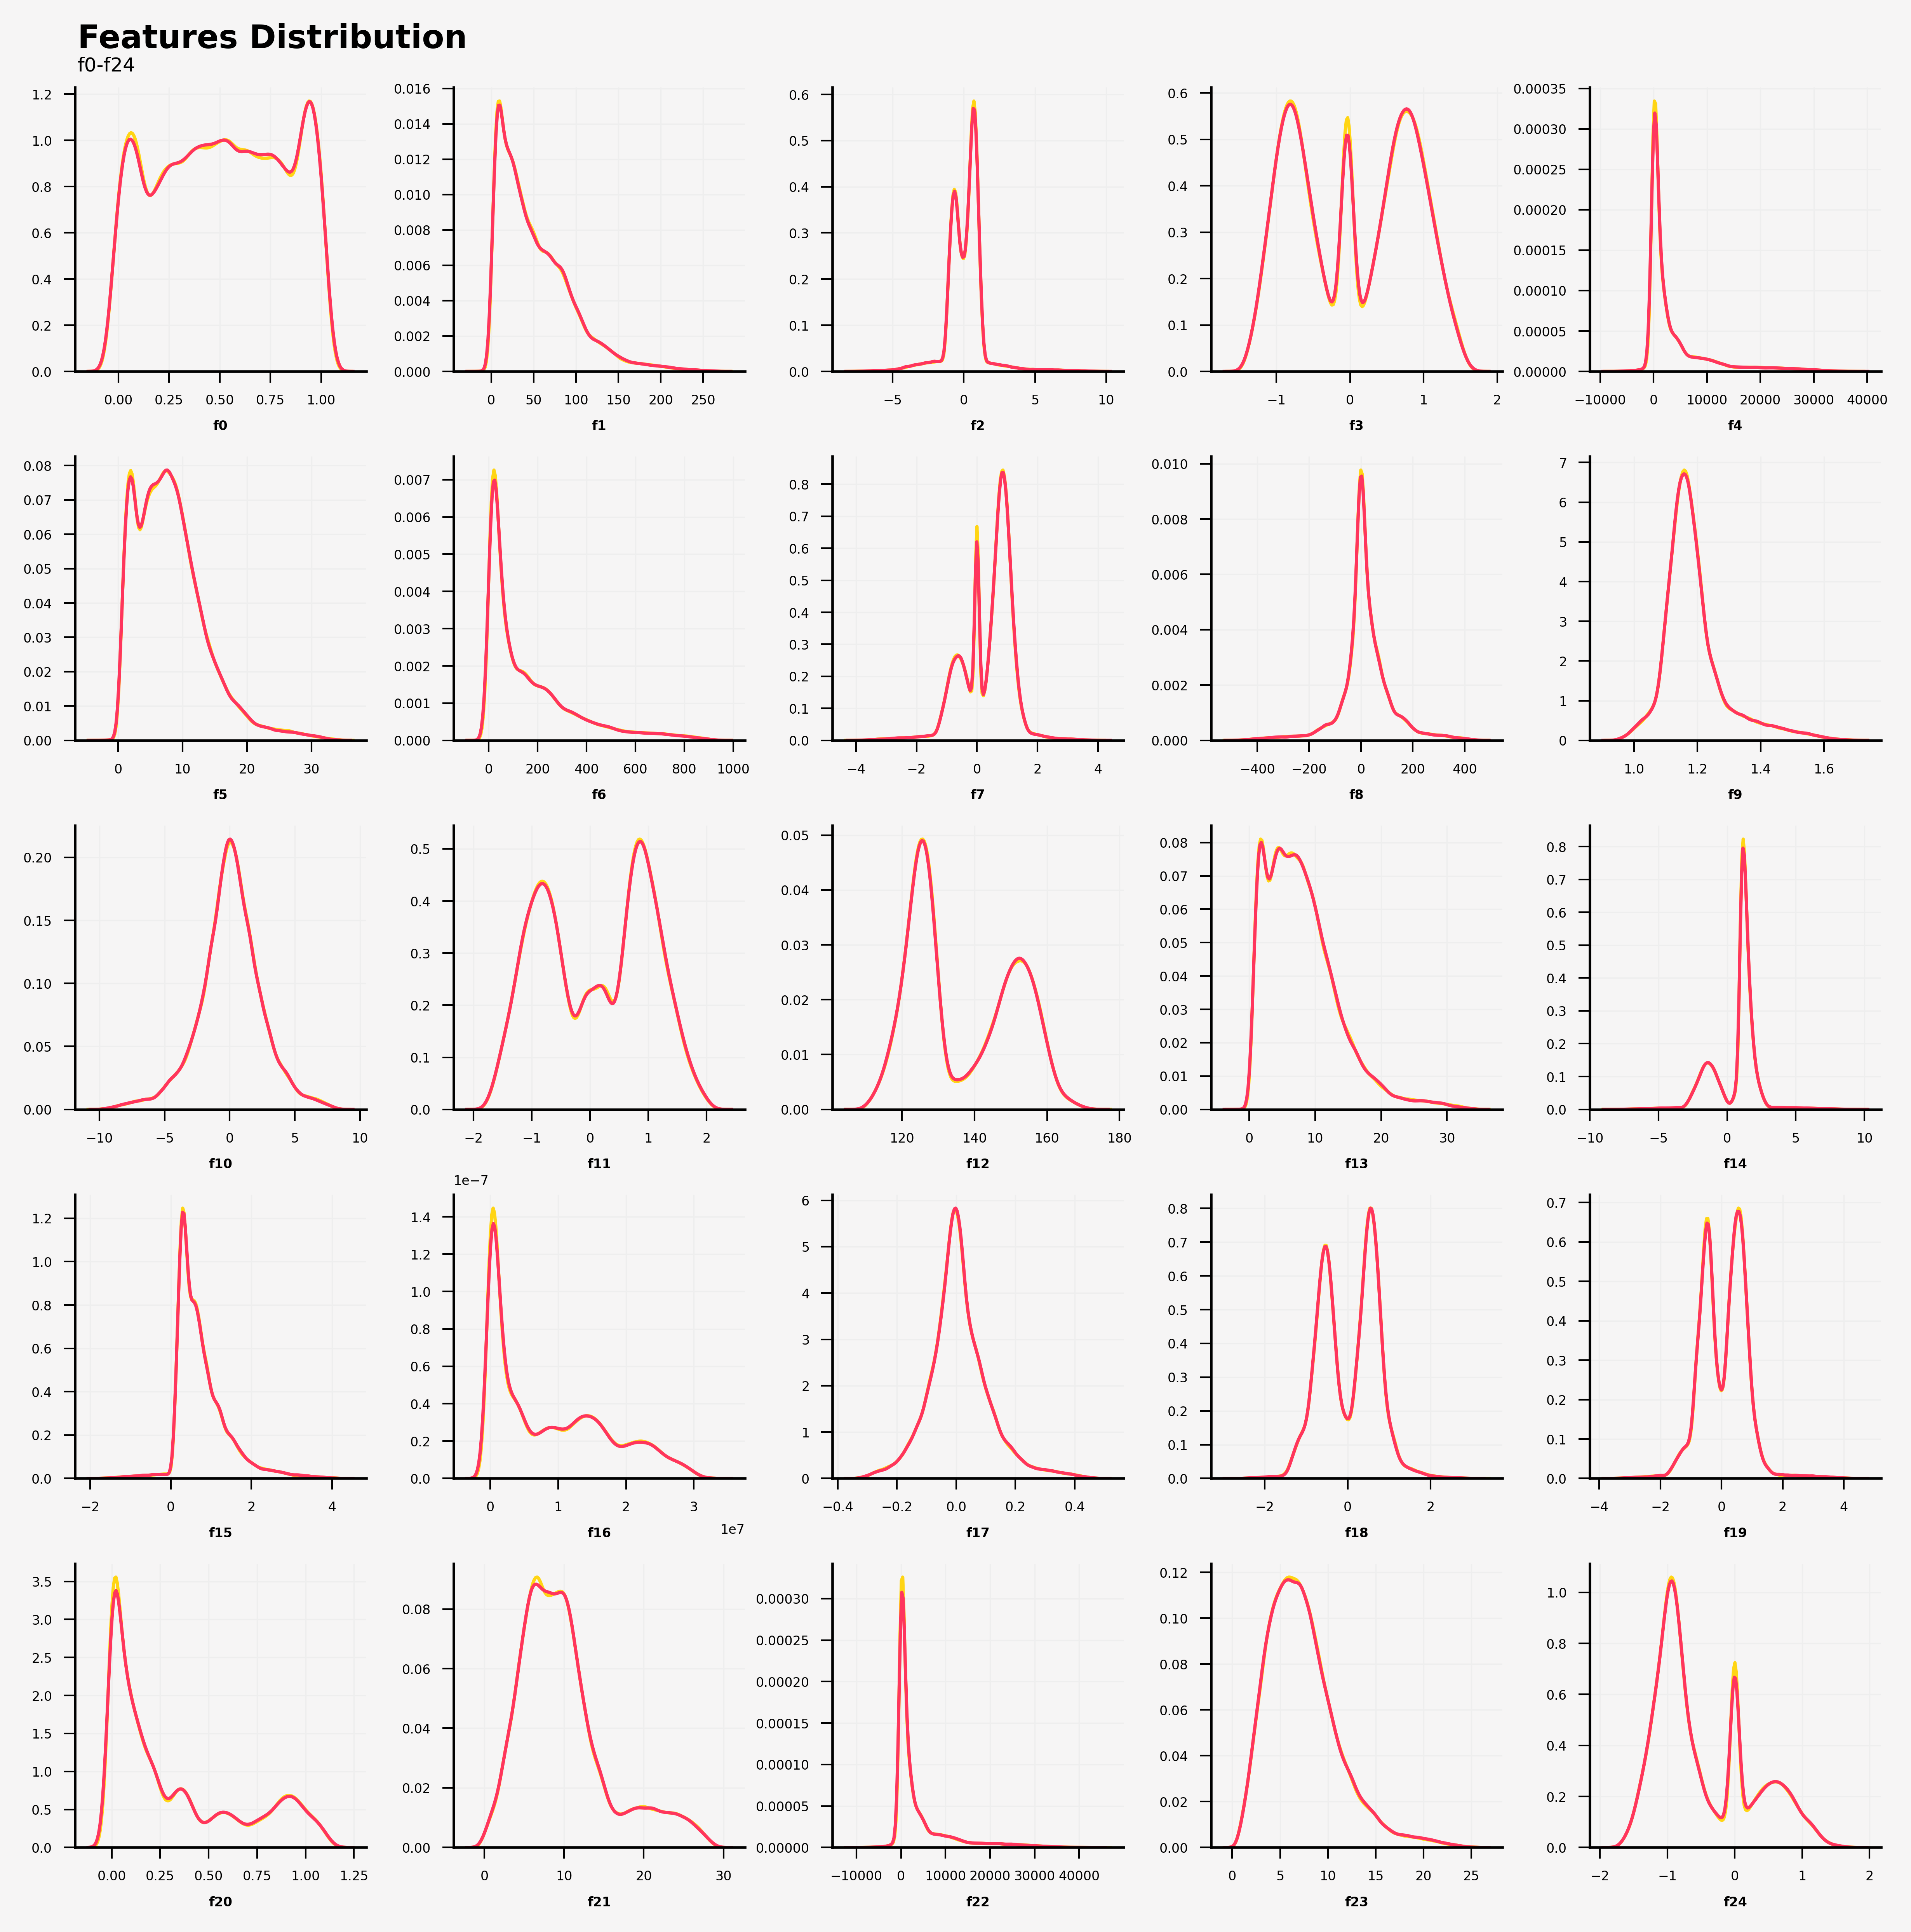

In [13]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.2, 1.4, 'Features Distribution', fontsize=10, fontweight='bold')
ax0.text(-0.2, 1.3, 'f0-f24', fontsize=6, fontweight='light')        

features = list(train_df.columns[1:26])

background_color = "#f6f5f5"
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

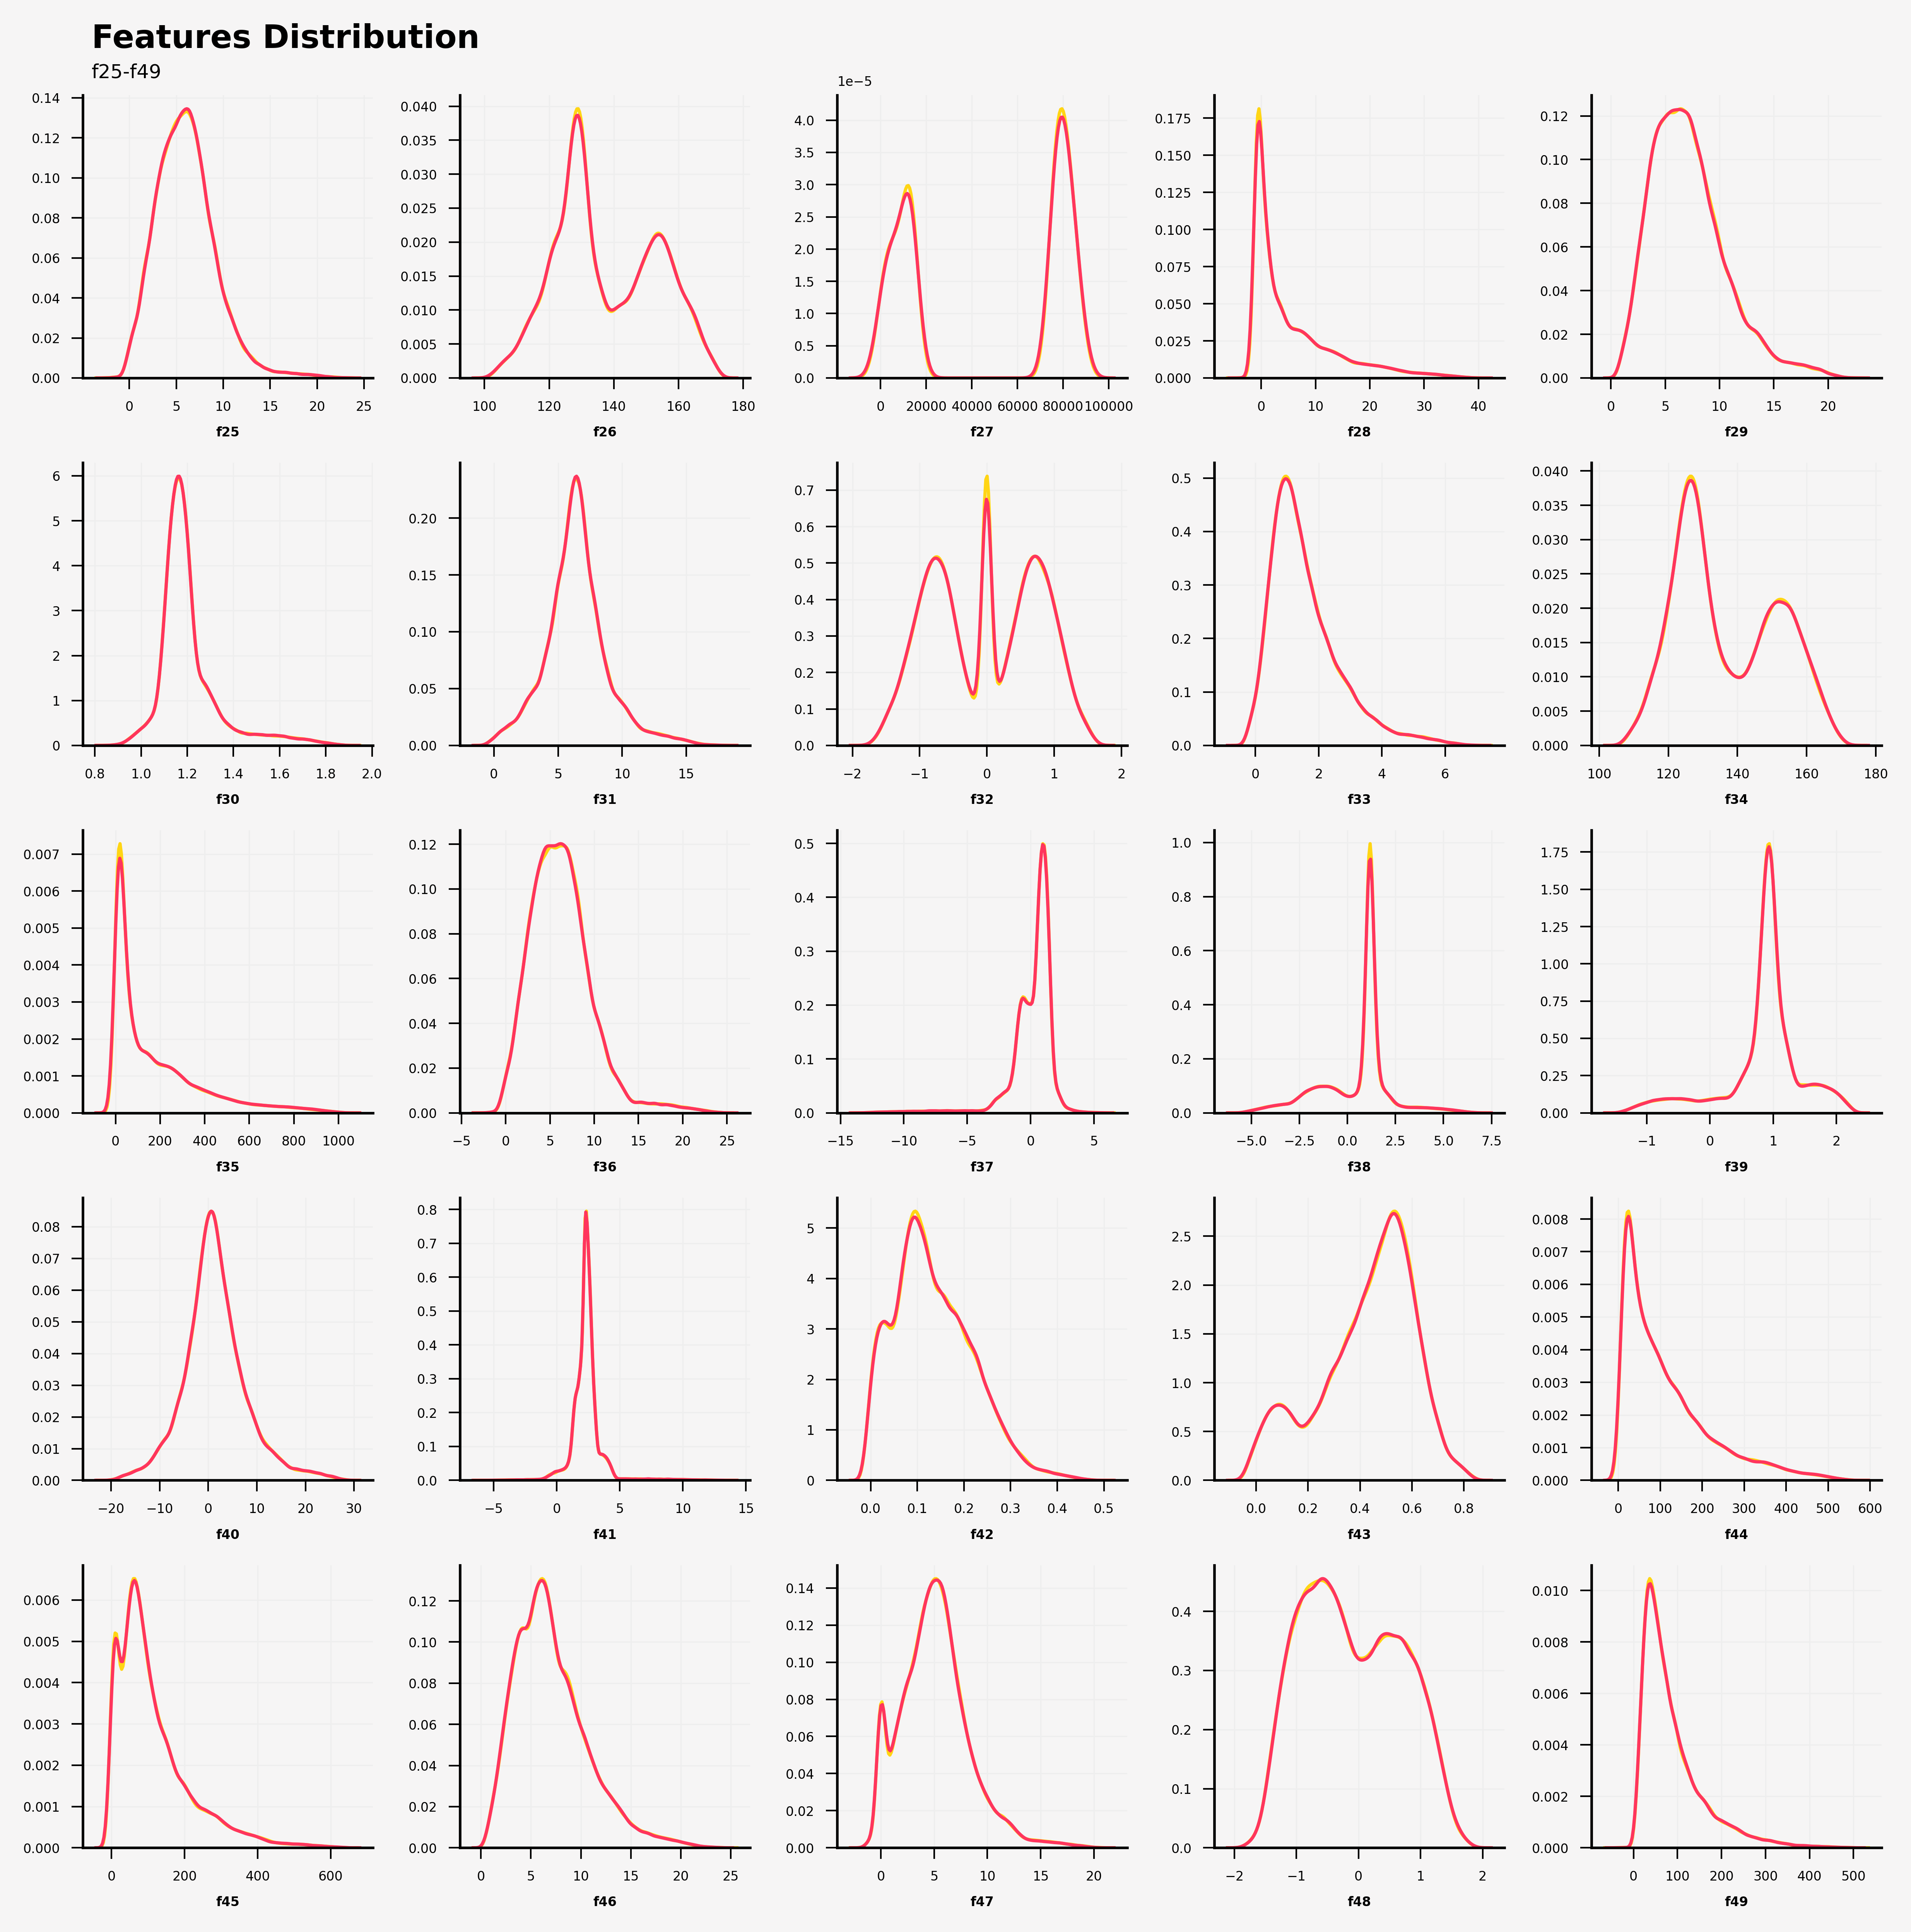

In [14]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-4, 0.165, 'Features Distribution ', fontsize=10, fontweight='bold')
ax0.text(-4, 0.15, 'f25-f49', fontsize=6, fontweight='light')      

features = list(train_df.columns[26:51])

background_color = "#f6f5f5"
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

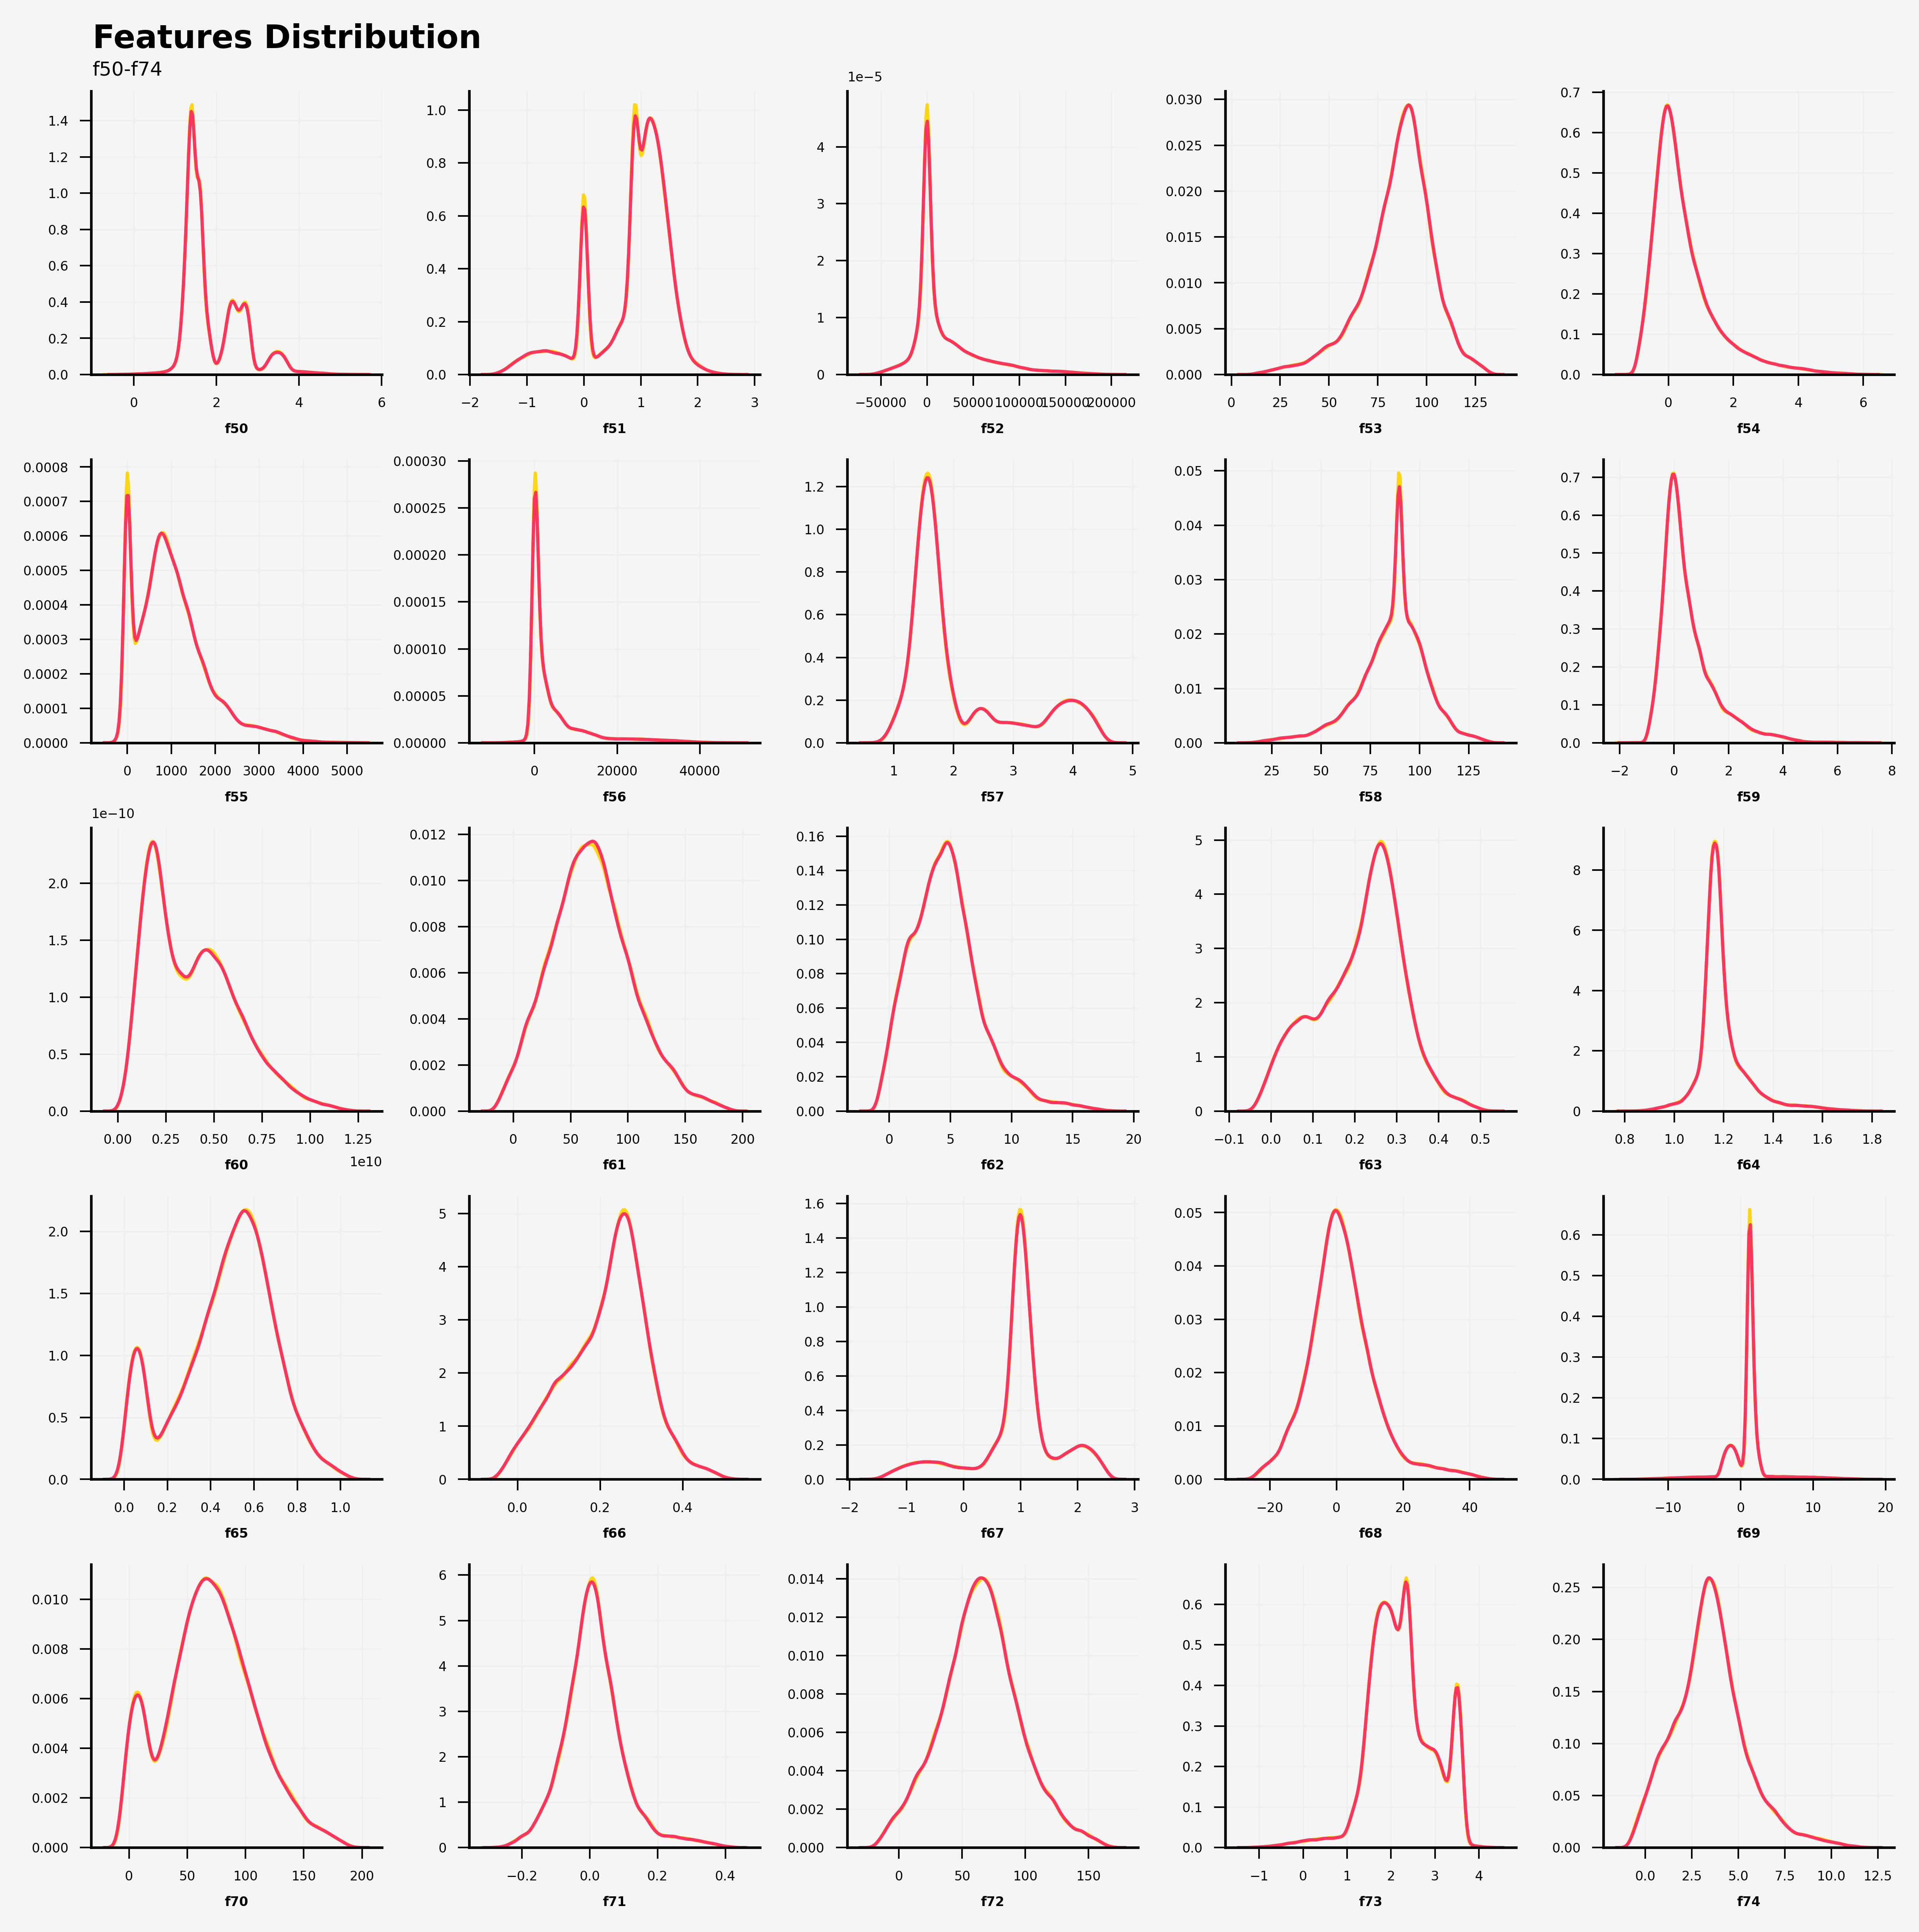

In [15]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-1, 1.8, 'Features Distribution ', fontsize=10, fontweight='bold')
ax0.text(-1, 1.65, 'f50-f74', fontsize=6, fontweight='light')      

features = list(train_df.columns[51:76])

background_color = "#f6f5f5"
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

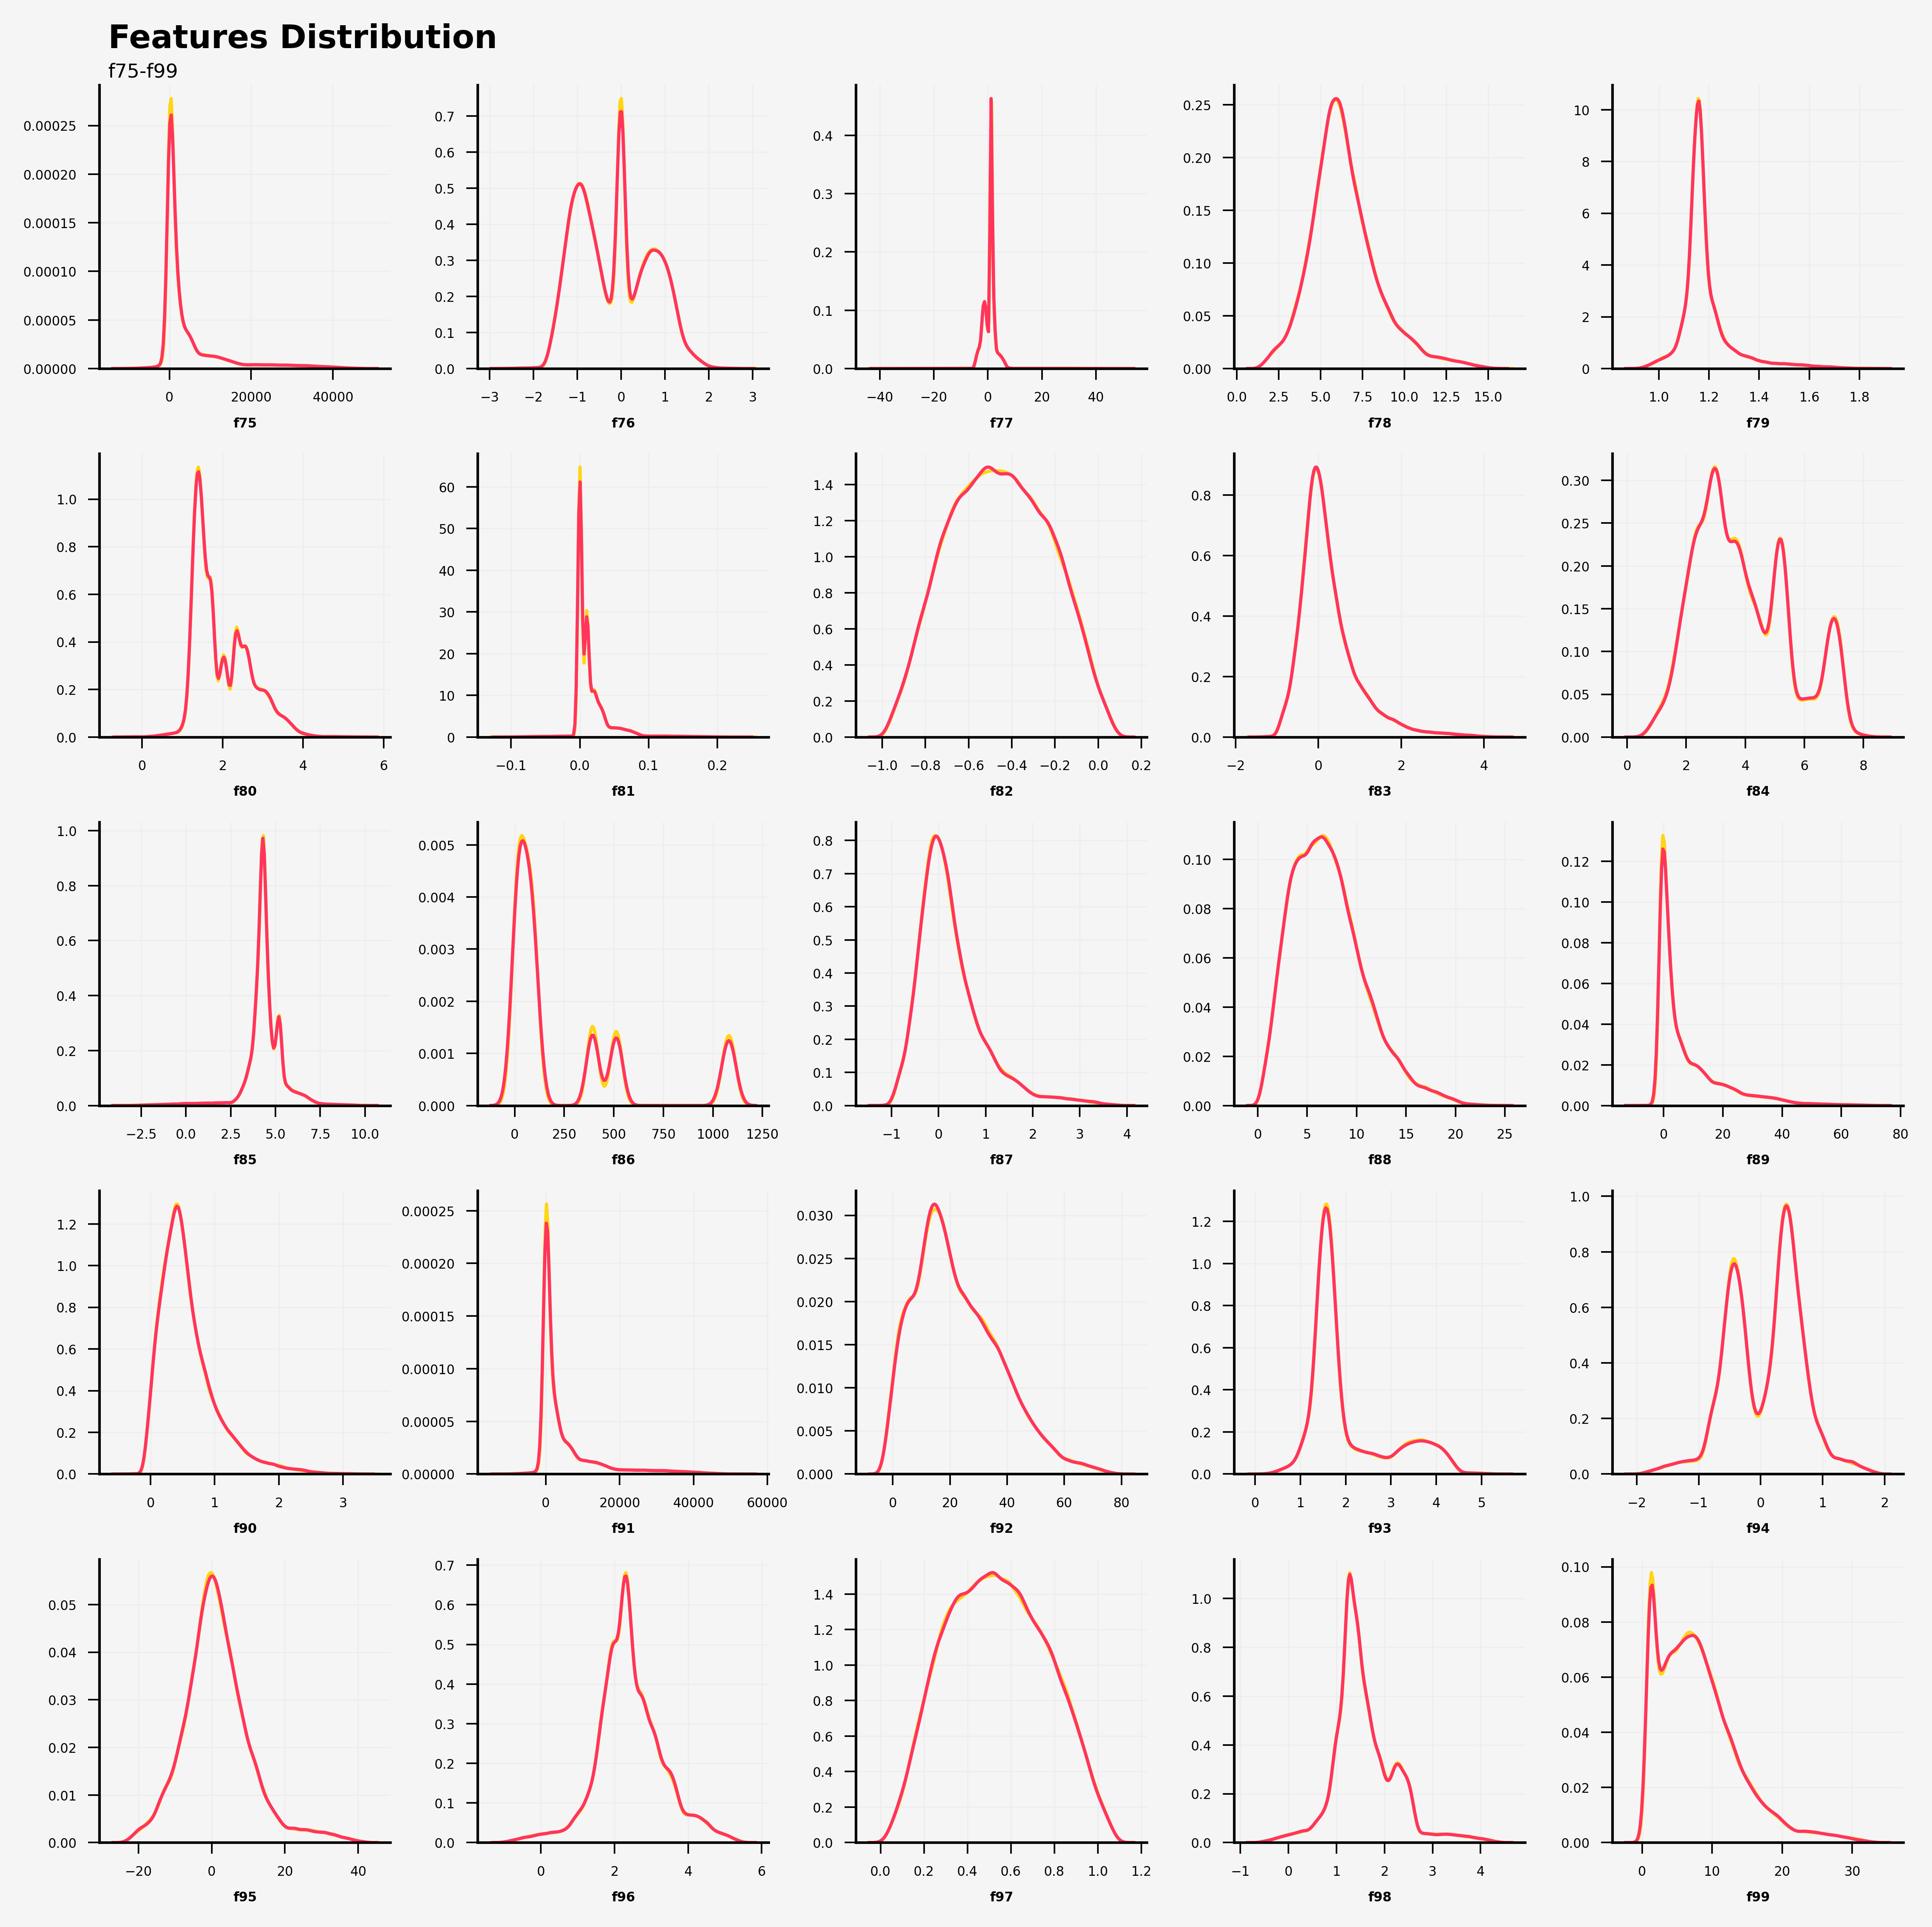

In [17]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-15000, 0.00033, 'Features Distribution ', fontsize=10, fontweight='bold')
ax0.text(-15000, 0.00030, 'f75-f99', fontsize=6, fontweight='light')

features = list(train_df.columns[76:101])

background_color = "#f6f5f5"
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

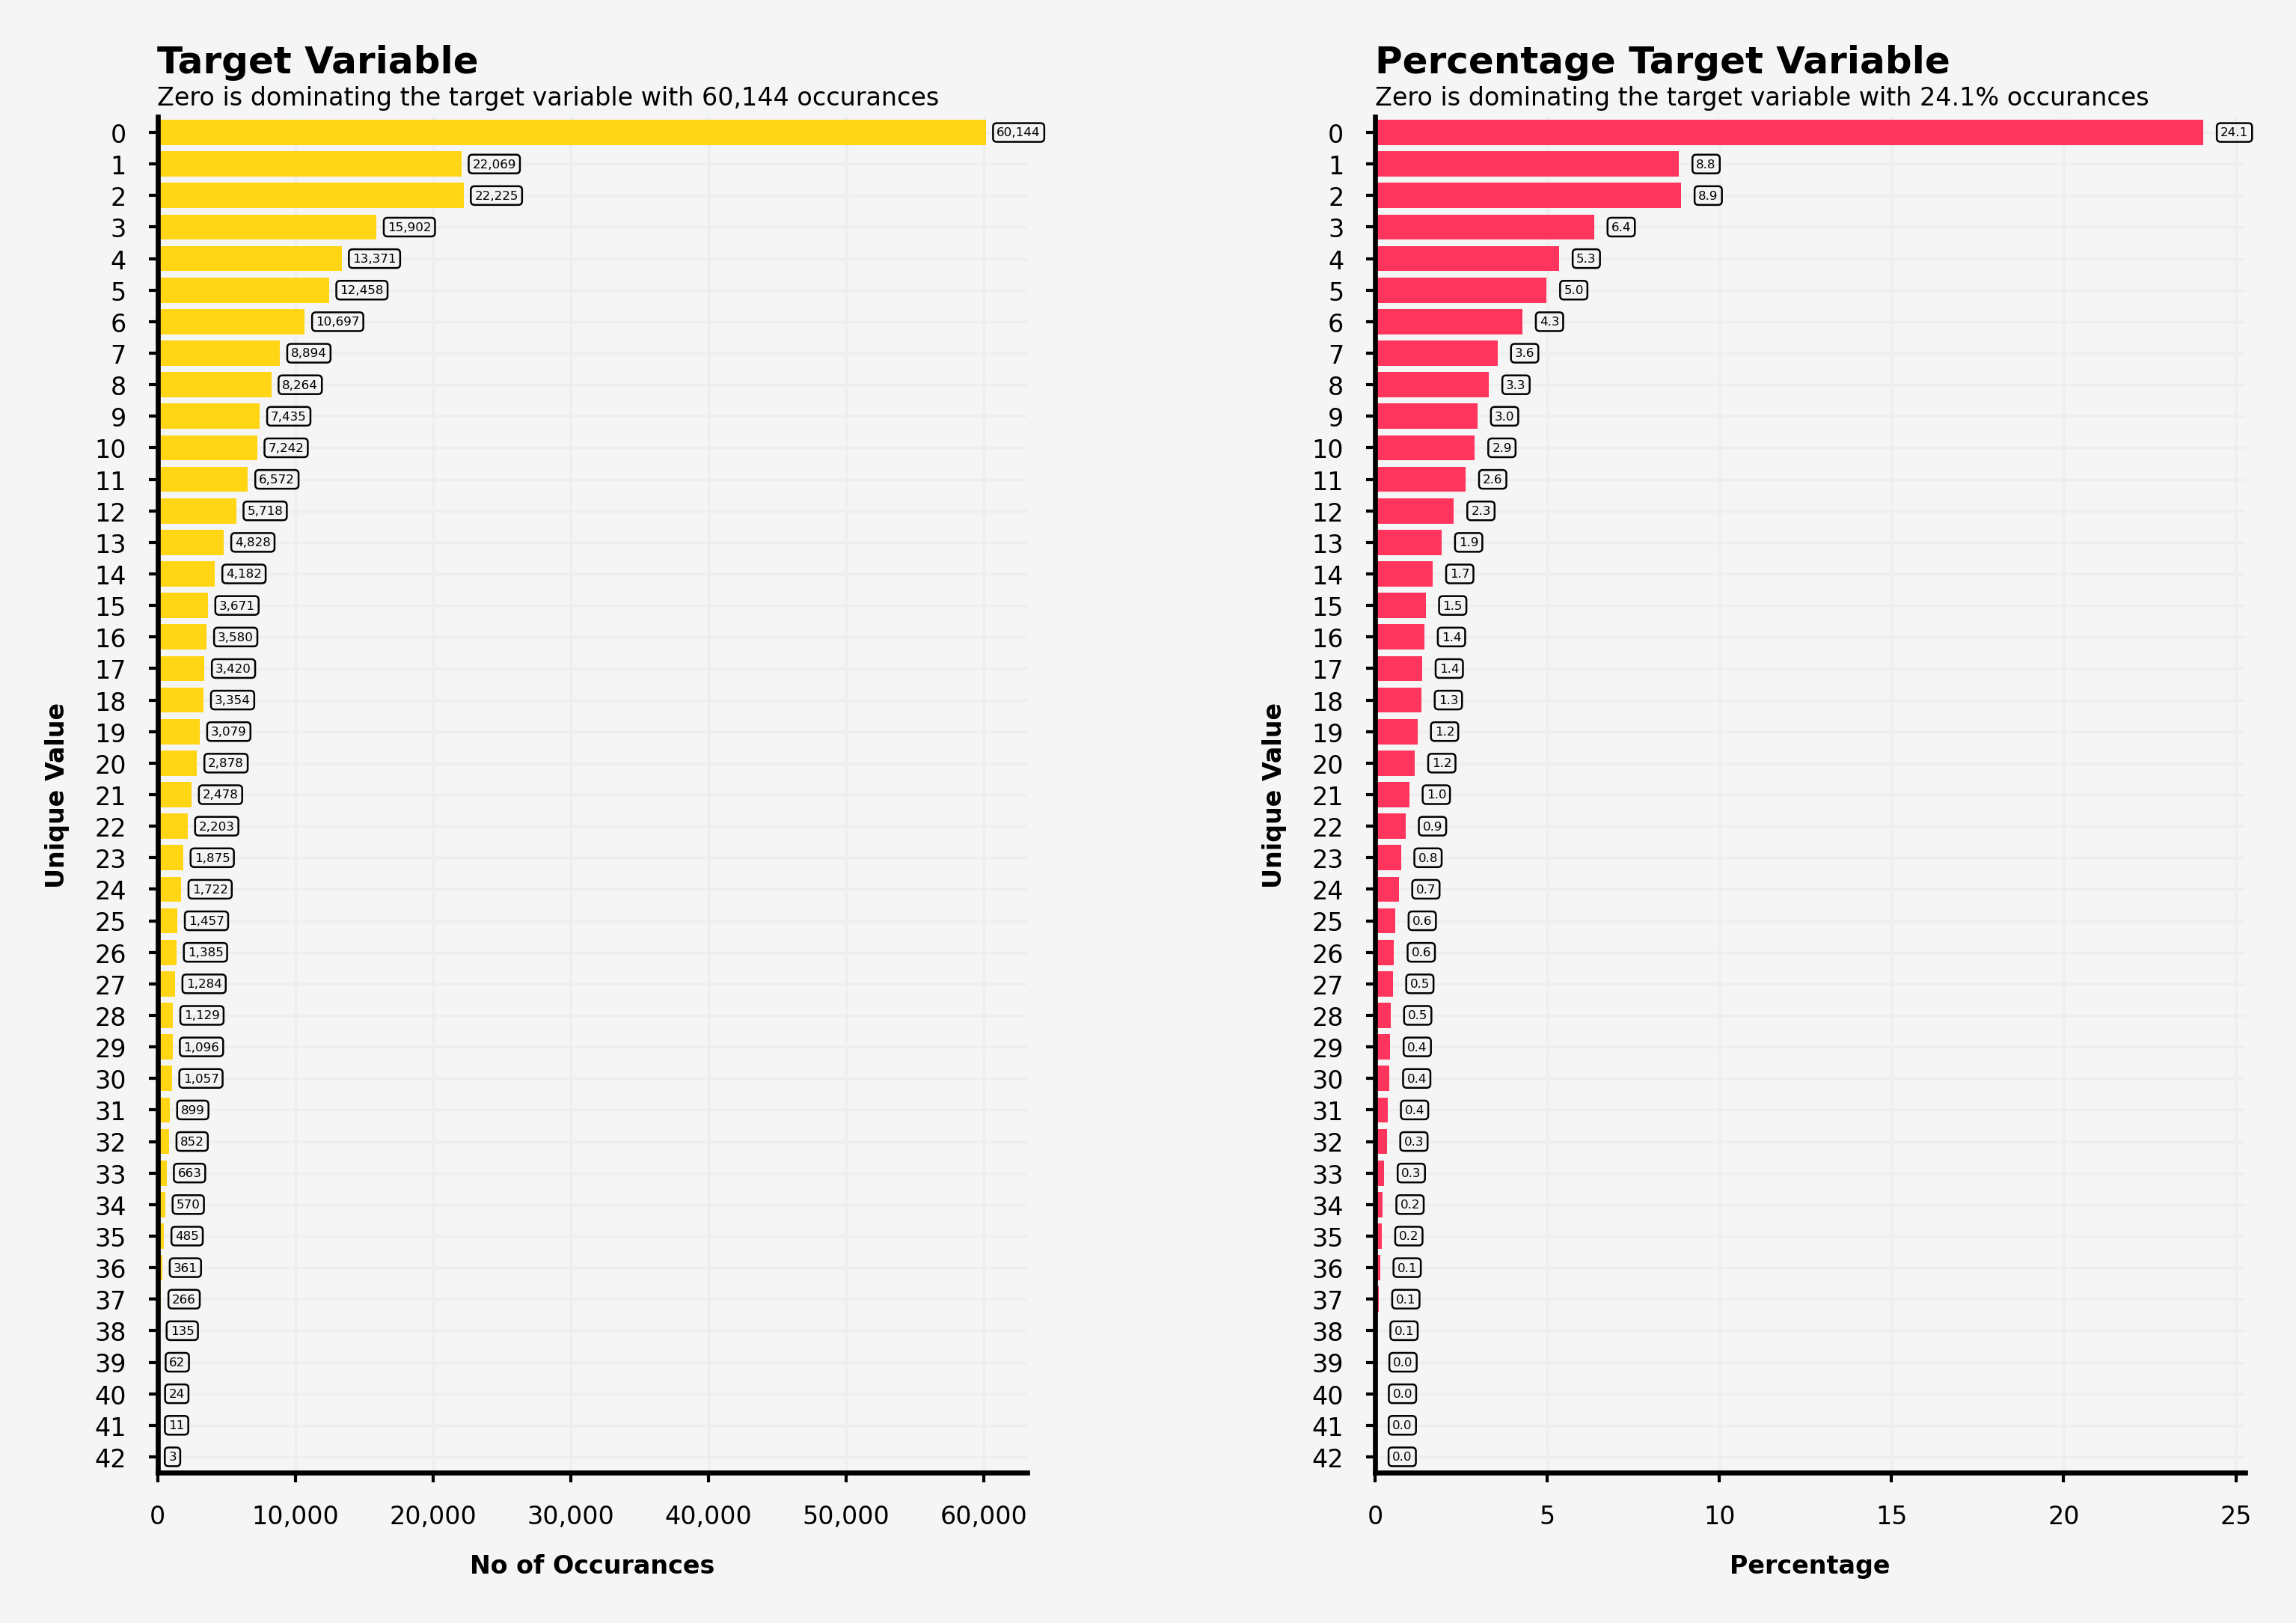

In [18]:
unique_values_target = pd.DataFrame(train_df['loss'].value_counts())
unique_values_target = unique_values_target.reset_index(drop=False)
unique_values_target.columns = ['Value', 'Count']

unique_values_percentage_target = pd.DataFrame(train_df['loss'].value_counts()/train_df.shape[0] * 100)
unique_values_percentage_target = unique_values_percentage_target.reset_index(drop=False)
unique_values_percentage_target.columns = ['Value', 'Count']

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*43)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_target['Value'], x=unique_values_target['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("No of Occurances",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Unique Value",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -2.8, 'Target Variable', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1.5, 'Zero is dominating the target variable with 60,144 occurances', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 800
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
sns.set_palette(['#ff355d']*43)

ax0 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_percentage_target['Value'], x=unique_values_percentage_target['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Percentage",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Unique Value",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -2.8, 'Percentage Target Variable', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1.5, 'Zero is dominating the target variable with 24.1% occurances', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.1f}'
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBClassifier 
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

folds = 10
features = list(train_df.columns[1:101])

In [ ]:
train_oof = np.zeros((250000,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['loss'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['loss']
    y_valid = X_valid['loss']
    X_train = X_train.drop('loss', axis=1)
    X_valid = X_valid.drop('loss', axis=1)
    
    model = LinearRegression()

    model =  model.fit(X_train, y_train)
    temp_oof = model.predict(X_valid)
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold+1} RMSE:', mean_squared_error(y_valid, temp_oof, squared=False))
    
print(f'OOF Accuracy: ', mean_squared_error(train_df['loss'], train_oof, squared=False))

Fold 1 RMSE: 7.887813957772779
Fold 2 RMSE: 7.903552980754781
Fold 3 RMSE: 7.893629689043373
Fold 4 RMSE: 7.895451308450434
Fold 5 RMSE: 7.8928889725712486
Fold 6 RMSE: 7.902593614536076
Fold 7 RMSE: 7.902204108711505
Fold 8 RMSE: 7.9040999167797015
Fold 9 RMSE: 7.898252053982881
Fold 10 RMSE: 7.8946666000197165
OOF Accuracy:  7.897517036750349


In [31]:
test_preds = None
train_oof = np.zeros((250000,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['loss'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['loss']
    y_valid = X_valid['loss']
    X_train = X_train.drop('loss', axis=1)
    X_valid = X_valid.drop('loss', axis=1)
    
    model = LGBMRegressor(random_state=42)

    model =  model.fit(X_train, y_train, verbose=False)
    temp_oof = model.predict(X_valid)
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold+1} RMSE:', mean_squared_error(y_valid, temp_oof, squared=False))
    if test_preds is None:
        test_preds = model.predict(test_df.values)
    else:
        test_preds += model.predict(test_df.values)
    
print(f'OOF Accuracy: ', mean_squared_error(train_df['loss'], train_oof, squared=False))
test_preds /= 10

Fold 1 RMSE: 7.862738503545878
Fold 2 RMSE: 7.862411075654118
Fold 3 RMSE: 7.868078966360066
Fold 4 RMSE: 7.869540505800917
Fold 5 RMSE: 7.857685103133939
OOF Accuracy:  7.864091991718352


In [32]:
submission = pd.DataFrame({
        "id": test_df["id"],
        "loss": test_preds
    })
submission.to_csv('./submission.csv', index=False)

In [33]:
test_preds = None
train_oof = np.zeros((250000,))
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[features], train_df['loss'])):
    X_train, X_valid = train_df.iloc[train_idx], train_df.iloc[valid_idx]
    y_train = X_train['loss']
    y_valid = X_valid['loss']
    X_train = X_train.drop('loss', axis=1)
    X_valid = X_valid.drop('loss', axis=1)
    
    model = CatBoostRegressor(random_state=42)

    model =  model.fit(X_train, y_train, verbose=False)
    temp_oof = model.predict(X_valid)
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold+1} RMSE:', mean_squared_error(y_valid, temp_oof, squared=False))
    
    if test_preds is None:
        test_preds = model.predict(test_df.values)
    else:
        test_preds += model.predict(test_df.values)
    
print(f'OOF Accuracy: ', mean_squared_error(train_df['loss'], train_oof, squared=False))
test_preds /= 10

Fold 1 RMSE: 7.854647485174312
Fold 2 RMSE: 7.849140493548061
Fold 3 RMSE: 7.857139020125487
Fold 4 RMSE: 7.860109644259546
Fold 5 RMSE: 7.850986354034538
OOF Accuracy:  7.854405611329326


In [34]:
submission = pd.DataFrame({
        "id": test_df["id"],
        "loss": test_preds
    })
submission.to_csv('./submission1.csv', index=False)